# Logistic Regression For Breast Cancer Biopsy Classification

The goal of this notebook is to use a large dataset of biopsy sampels from breast cancer tumors to construst a binary classification model to determine whether a tumor is malignant or benign.
This notebook explores the use of logistic regression for binary classification of Breast Cancer. Logistic regression is a fundamental machine learning algorithm that models the probability of an outcome using the logistic (sigmoid) function.



## Data


The dataset we will use to train our model is called the Breast Cancer Wisconsin (Diagnostic) Data Set, with 569 biopsy samples. Each sample is either malignant (1) or benign (0) and contains 10 associated features.


The data from this project is from a tumor biopsy where the extracted tissue is sampled with a special needle. The cells are stained with different dyes to help visualize their shapes, quantity of DNA, etc. These properties provide clues and insight into the rate of cell division.
More information regarding this data set can be found here: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf

The dataset contains 10 different features of the biopsies.

* $diagnosis$: Whether the tumor was diagnosed as malignant (1) or benign (0).
* $perimeter$_$mean$: The average perimeter of cells in that particular biopsy
* $radius$_$mean$: The average radius of cells in that particular biopsy
* $texture$_$mean$: The average texture of cells in that particular biopsy
* $area$_$mean$: The average area of cells in that particular biopsy
* $smoothness$_$mean$: The average smoothness of cells in that particular biopsy
* $concavity$_$mean$: The average concavity of cells in that particular biopsy
* $symmetry$_$mean$: The average symmetry of cells in that particular biopsy





Load Data


In [4]:
# Import required libraries
import pandas as pd
from sklearn import metrics

#Get data from the API
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

data = pd.read_csv('cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer.csv')
del data

cancer.csv          100%[===================>]  26.66K  --.-KB/s    in 0s      


<ipython-input-4-3f34e081fffa>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)


In [5]:
# Packages for data navigation
import os             # Good for navigating your computer's files
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)
from sklearn.metrics import accuracy_score   # Great for creating quick ML models


In [6]:
data_path  = 'cancer.csv'

#creates pandas dataframe
dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

In [7]:
dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [8]:
# data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


### Data Visualization


In [2]:
# data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

First lets focus on the feature mean radius. From the graph we can see that malignant cells typically have a bigger radius.

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


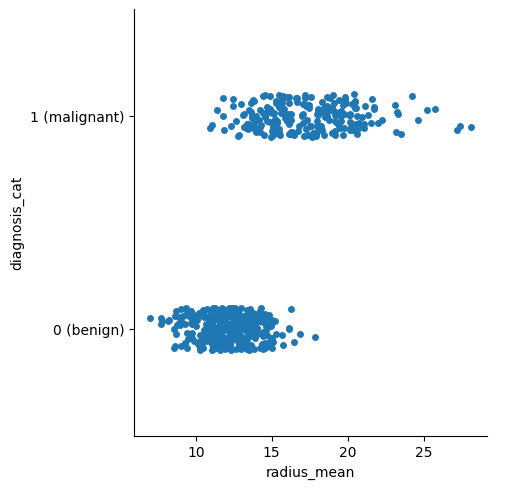

In [9]:
#create a seaborn plot of radius versus the diagnosis
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
dataframe.head()

## Predictions

First, we will start by predicting based on the single feature of the radius mean using the linear regression algorithm.

### Linear Regression


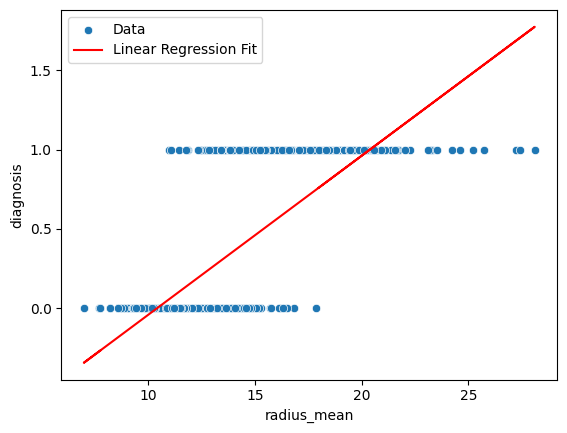

In [10]:
from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend([ 'Data', 'Linear Regression Fit'])

### Classification with a  Simple Boundary Classifier
Linear regression does not work as we are predicting a categorical variable. Now we will use a boundary classifier

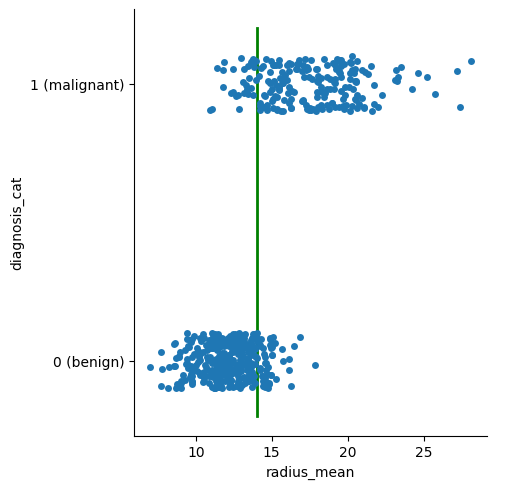

In [11]:
boundary = 14 # set the boundary

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary, boundary], [-.2, 1.2], 'g', linewidth = 2)

In [14]:
#boundary classifier method
def boundary_classifier(target_boundary, radius_mean_series):
  result = []
  for i in radius_mean_series:
    if i < target_boundary:
      result.append(0)
    else:
      result.append(1)


  return result

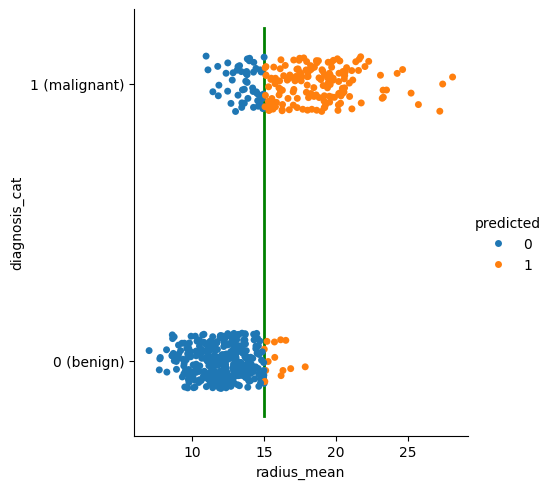

In [15]:
chosen_boundary = 15
y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

In [16]:
print (list(y_true))
print (y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [17]:
#accuracy of model
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.8875219683655536


### Logistic Regression
This is essentially using machine learning to determine the optimal boundary


In [18]:
from sklearn.model_selection import train_test_split
#implement train test split with an 80-20 split
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [19]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),1
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [20]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


### Single Variable Logistic Regression
Single variable logistic regression using radius mean to determine the diagnosis.

In [21]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


In [22]:
# Here, we create a 'reg' object that handles the line fitting for us!
logreg_model = linear_model.LogisticRegression()


In [23]:

logreg_model.fit(X_train,y_train)


LogisticRegression()

In [24]:
X_test = test_df[X]
y_test = test_df[y]

In [25]:
##Create predictions
y_pred = logreg_model.predict(test_df[X])

Visualize results

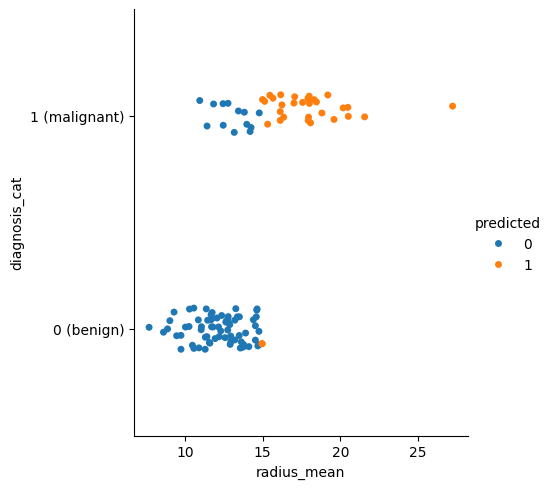

In [26]:
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


<Axes: xlabel='radius_mean', ylabel='Predicted Probability'>

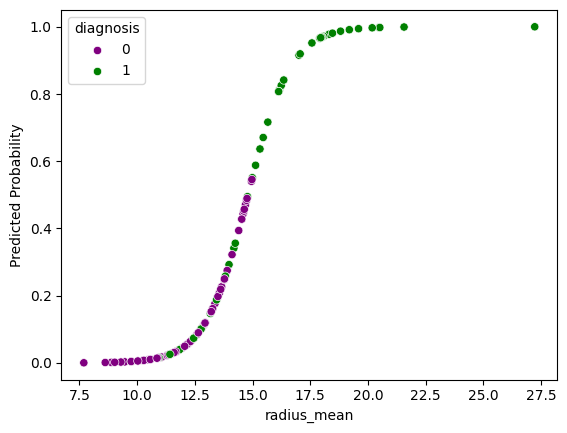

In [28]:
# this plot desplays the logistic regression's soft probabilities

# Let's visualize the probabilities for `X_test`
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

The Y-axis is the  probability of being 'malignant' and the X-axis is the radius mean. The colors show the true diagnosis.


### Multiple Feature Logistic Regression

Now lets use other features for a more optimal model result

In [31]:
X = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean']
y = 'diagnosis'

# 1. Split data into train and test
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

X_train = train_df[X]
y_train = train_df[y]

#create model
logreg_model = linear_model.LogisticRegression()
logreg_model.fit(X_train,y_train)

X_test = test_df[X]
y_test = test_df[y]

y_pred = logreg_model.predict(test_df[X])
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8771929824561403


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression can learn an optimal classification boundary by using multiple features together, which can improve its prediction accuracy even more!